In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# imports our predefined function
import dataproject.functions as func
import Style_plot

# import bokeh code specific to outputting graphs in jupyter notebook
from bokeh.io import output_notebook, push_notebook,show

# This comand tells bokeh to output in the notebook
output_notebook()

Loading BokehJS ...

# Detailed plot

This first plot gives a representations of what a golden and a dead cross is. It is also easy to see that while the two crosses that we have pointed out, predicts  the market well. The graph also has multiple crosses of the running means where our prediction does not stick.
Ths is to be expected in technical analysis, especially one as simple as ours. This is an interesting theory, which we wish to visualize, but not a magical rule. 

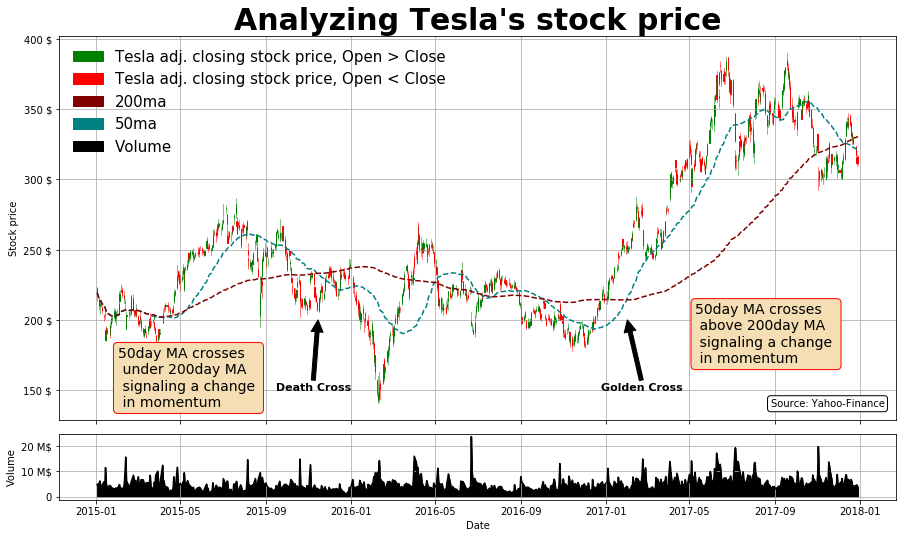

In [12]:
df = Style_plot.figure_1()

So now we want to see how our simple investing theory is doing. 
We are now calculating the return on our strategy. We are using vertical lines, 
to make it easy for the reader to recognize, when there is a cross. 
We are comparing our strategy with the "market", the return of Tesla, if you bought
it at the start date, and just kept it, without making any trade. 

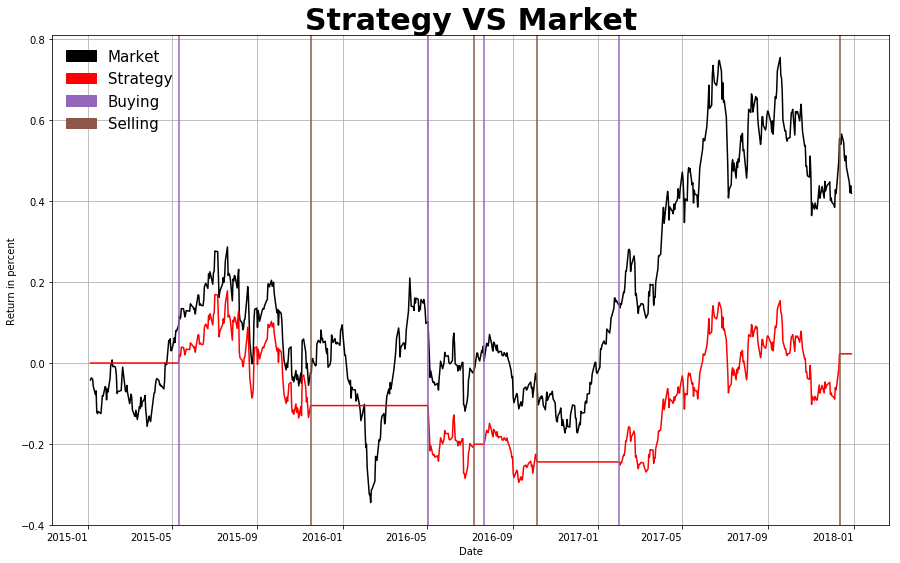

In [13]:
df = Style_plot.figure_2(df)

In this last figure we want to show the different in percent points. 
To follow how our strategy is doing, comparing to the market. We already saw 
in figure 2, that the return of our strategy was underperforming the market. 
Here we want to make it clear, with how much we are underperforming. As you can see,
we are doing really bad. This is probably due to the fact, that we are buying high, 
and often selling low. Keep in mind, that this simple theory have only been tested, 
on one company. Though, we do not think the results will drasticaly change. 
So our conclusion is, that you can't base your investing only on this theory, 
but it can be used as sell and buy signals. 

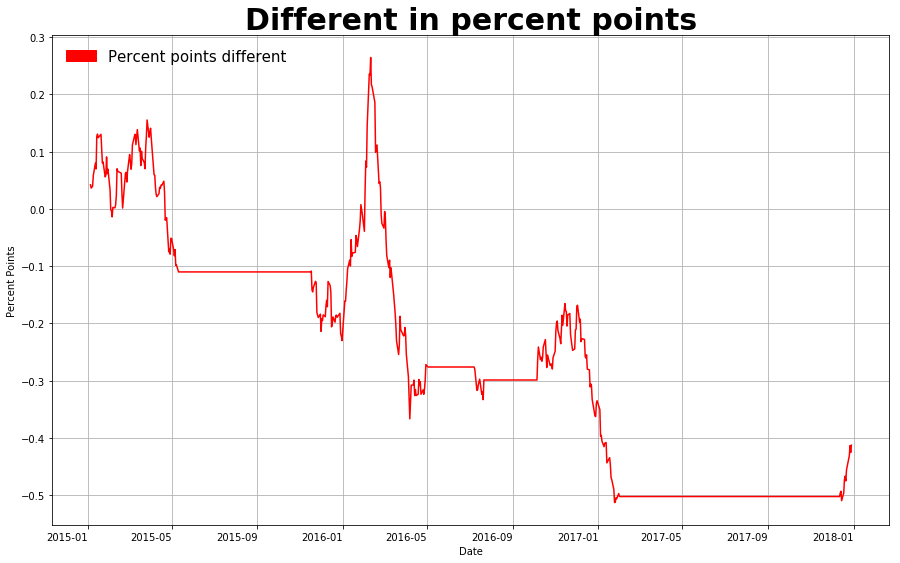

In [14]:
Style_plot.figure_3(df)

We have now looked at how well our strategy would have done on Tesla-stocks. But now we want to go a bit broader, and show how it works for multiple stocks.

# Download data with function for plotting interactively 

In [17]:
# First we choose which companys and indices we want
stock_list = ['TSLA', 'MAERSK-A.CO', 'VWS.CO', 'NOVO-B.CO', 'FB', '^DJI', 'GOOG', 'VELO.CO', '^IXIC', 'INDY', '^N100','^GDAXI']
# For these companys we supply a name dictionairy, this is optional
stock_dict = {'TSLA': 'Tesla', 'MAERSK-A.CO':'Mærsk A','VWS.CO': 'Vestas','NOVO-B.CO':'Novo Nordisk','^IXIC':'NASDAQ Composite',\
             'FB':'Facebook','^DJI':'Dow Jones Industrial Average','GOOG':'Google','VELO.CO':'Veloxis Pharmaceuticals', \
             'INDY': 'Indian top 50 index','^N100':'EURONEXT 100', '^GDAXI':'German DAX index'}

In [18]:
d = func.download_data_with_runmean(stocks=stock_list,from_year = 2011, to_year=2019,stock_dict=stock_dict)
# The function takes all years and stocks avalible on Yahoo if you know the the symbol

# Plotting interactively

This first plot is simply the adjusted closing price of all the stocks we have chosen. Feel free to view the multiple stocks and also experiment with the interaction options listed below

In [19]:
# This function plots the adjusted closing price all the companys in the symblos_list. 
func.plot_close(d=d)
## This function has multiple interaction options:
    # If your hover your mouse over the plot it will show you additional information, 
    # about prices, date and also the volume traded a given day
    # The right of the figure has 5 options,
    # 'Pan' you do this by presing and pulling with the mouse on the figure
    # 'Box zoom', you press the option, and then you can zoom in on a chosen area by marking it with the mouse
    # 'Reset' resets all the changes made with the above funtions
    # 'Save' saves a picture of the figure on your computer
    # 'Hover' toggles wether or not the hover option is active

# Different companys is chosen in the bottom,
# For the interaction to be active, it has to be cell that that has most recetnly been run

interactive(children=(Dropdown(description='Choose a stock or index:', layout=Layout(width='50%'), options=('D…

# Including the running means

The next plot has the running means included, and is thus the last graph of our analysis. You can see, that for some stocks (Facebook, Google, Maersk and Novo) the theory works well over long stretches of time. But also that when the price fluctuates around a fixed point for longer periods, the theory loses all merit. For example Veloxis between 2015 and 2017.

In [20]:
func.plot_close_mean(d=d)
# In addtion to having all the same features as the figure above,
# this figure also allows you to mute a chosen plot by mouse-clicking its name in the legend

interactive(children=(Dropdown(description='Choose a stock or index:', layout=Layout(width='50%'), options=('D…